# Setup google drive
---

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
project_path = '/gdrive/My Drive/Colab Notebooks/pneumonia'
%cd '/gdrive/My Drive/Colab Notebooks/pneumonia'

/gdrive/My Drive/Colab Notebooks/pneumonia


In [3]:
!ls

 in   out  'Reconocer pneumonia.ipynb'


# Libraries

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pathlib
import random

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Code

In [6]:
dataset_folder_path = project_path + "/in/images-dataset"

normal_dataset_name = "NORMAL"
pneumonia_dataset_name = "Viral Pneumonia"

In [7]:
def create_nn_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(512, 512)))
  model.add(layers.Dense(256, activation=tf.nn.relu))
  model.add(layers.Dense(128, activation=tf.nn.relu))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1, activation=tf.nn.sigmoid))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [8]:
nn_model = create_nn_model()

In [9]:
data_dir = pathlib.Path(dataset_folder_path)

In [10]:
normal_dataset_name

'NORMAL'

In [11]:
normal_images_paths = list(data_dir.glob(normal_dataset_name + '/*'))
pneumonia_images_paths = list(data_dir.glob(pneumonia_dataset_name + '/*'))

In [12]:
def create_images_dataframe(images_path, tag):
    items = [];
    
    for image_path in images_path:

      image = keras.preprocessing.image.load_img(
          image_path, color_mode='grayscale', target_size=(512, 512),
          interpolation='nearest'
      )

      image = keras.preprocessing.image.img_to_array(image)
      image = np.reshape(image, (512, 512))
      item = [(image, tag)]
      items = items + item

    return items

In [13]:
normal_dataset = create_images_dataframe(normal_images_paths, 0)
pneumonia_dataset = create_images_dataframe(pneumonia_images_paths, 1)

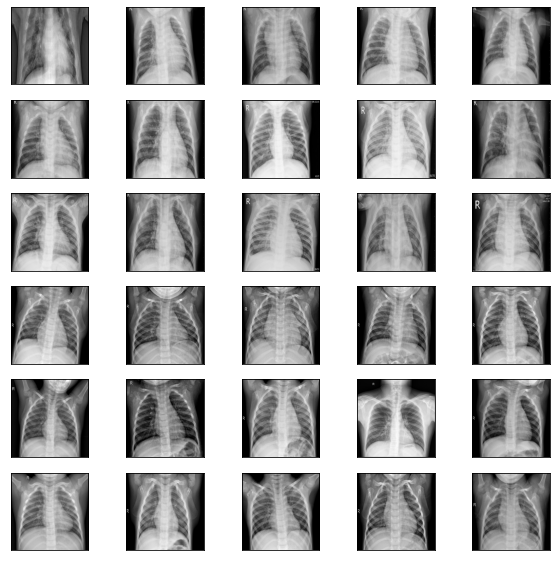

In [14]:
plt.figure(figsize=(10, 10))

for i in range(30):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  if i < 15:
    plt.imshow(pneumonia_dataset[i][0], cmap="gray")
  else:
    plt.imshow(normal_dataset[i][0], cmap="gray")

In [15]:
complete_dataset = normal_dataset + pneumonia_dataset
random.shuffle(complete_dataset)

X = [i[0] for i in complete_dataset]
y = [i[1] for i in complete_dataset]

In [16]:
print(len(X))

1757


In [17]:
X_train, X_test, y_train, y_test = X[:1405], X[1405:], y[:1405], y[1405:]

In [18]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [19]:
print(len(X_train))
print(len(y_train))

1405
1405


In [20]:
X_train.shape

(1405, 512, 512)

In [21]:
nn_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
44/44 [==============================] - 1s 30ms/step - loss: 0.4365 - accuracy: 0.8235
Epoch 2/20
44/44 [==============================] - 1s 30ms/step - loss: 0.2422 - accuracy: 0.9253
Epoch 3/20
44/44 [==============================] - 1s 30ms/step - loss: 0.1895 - accuracy: 0.9452
Epoch 4/20
44/44 [==============================] - 1s 29ms/step - loss: 0.1660 - accuracy: 0.9459
Epoch 5/20
44/44 [==============================] - 1s 30ms/step - loss: 0.1594 - accuracy: 0.9473
Epoch 6/20
44/44 [==============================] - 1s 29ms/step - loss: 0.1295 - accuracy: 0.9587
Epoch 7/20
44/44 [==============================] - 1s 29ms/step - loss: 0.1273 - accuracy: 0.9516
Epoch 8/20
44/44 [==============================] - 1s 29ms/step - loss: 0.1148 - accuracy: 0.9715
Epoch 9/20
44/44 [==============================] - 1s 29ms/step - loss: 0.0978 - accuracy: 0.9744
Epoch 10/20
44/44 [==============================] - 1s 29ms/step - loss: 0.1044 - accuracy: 0.9665
Epoch 11/

In [22]:
test_loss, test_acc = nn_model.evaluate(X_test, y_test)
print("Accuracy: ", test_acc)

11/11 [==============================] - 0s 14ms/step - loss: 0.2177 - accuracy: 0.9176
Accuracy:  0.9176136255264282


In [23]:
nn_model.save(project_path + "/out")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/pneumonia/out/assets


In [24]:
nn_model2 = keras.models.load_model(project_path + "/out/" )

In [25]:
normal_test_path = normal_images_paths[0]
normal_image_test = keras.preprocessing.image.load_img(
    normal_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

normal_image_test = keras.preprocessing.image.img_to_array(normal_image_test)
normal_image_test = np.reshape(normal_image_test, (512, 512))

In [26]:
pneumonia_test_path = pneumonia_images_paths[0]
pneumonia_image_test = keras.preprocessing.image.load_img(
    pneumonia_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

pneumonia_image_test = keras.preprocessing.image.img_to_array(pneumonia_image_test)
pneumonia_image_test = np.reshape(pneumonia_image_test, (512, 512))

Normal


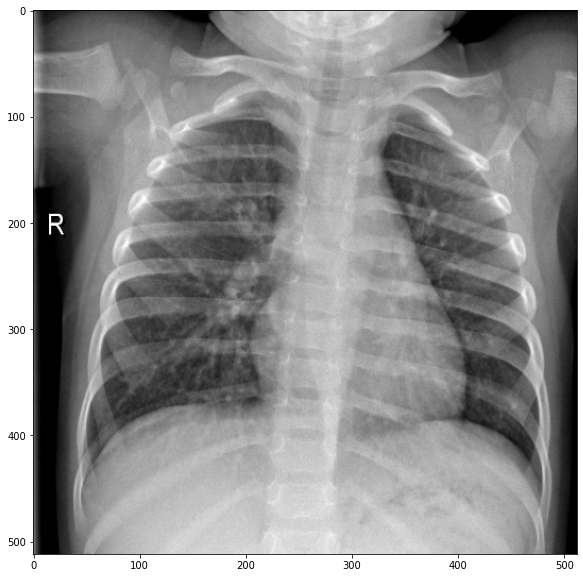

In [27]:
#Should to print normal
predict = nn_model2.predict(np.array([normal_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(normal_image_test, cmap="gray")
print("Normal" if predict[0] < 0.5 else "Pneumonia")

Pneumonia


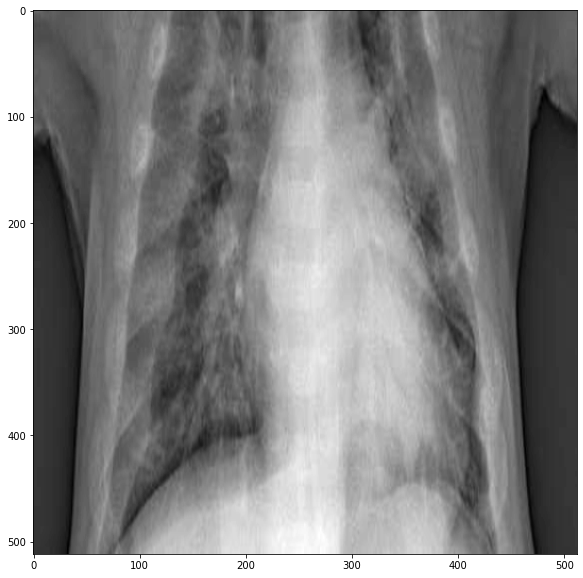

In [28]:
#Should to print pneumonia
predict = nn_model2.predict(np.array([pneumonia_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(pneumonia_image_test, cmap="gray")
print("Normal" if predict[0] < 0.5 else "Pneumonia")

Normal


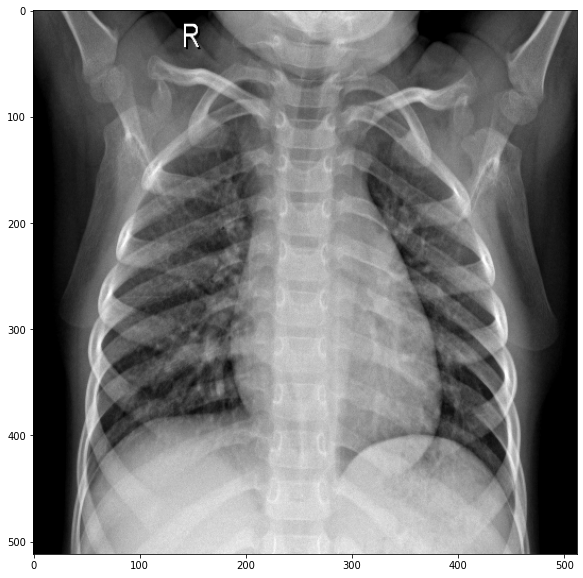

In [29]:
image_index = 15
predict = nn_model2.predict(np.array([X_test[image_index]]))

plt.figure(figsize=(10, 10))
plt.imshow(X_test[image_index], cmap="gray")
print("Normal" if predict[0] < 0.5 else "Pneumonia")